<a href="https://colab.research.google.com/github/wasimfaim/Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Project Name - Email Campaign Effectiveness Prediction

#  <b>Problem Statement</b>

Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

# **Let's Begin !**

## **Know the Data**

### Import Libraries

In [ ]:
#Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

### Data Set Loading

In [ ]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path of data in drive
file_location = '/content/drive/MyDrive/Email Campaign Effectiveness Prediction /Data/data_email_campaign.csv'
# Reading csv file
email_campaign_data = pd.read_csv(file_location)

### Dataset First View

In [ ]:
# Data
email_campaign_data.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


### Dataset Rows & Columns count

In [ ]:
# Getting the shape of dataset
email_campaign_data.shape

(68353, 12)

### Dataset Information

In [ ]:
#Check for any data information
email_campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [ ]:
#Check for any duplicates data
email_campaign_data.duplicated().sum()

0

#### Missing/Null Values

In [ ]:
#Check for any missing data
email_campaign_data.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

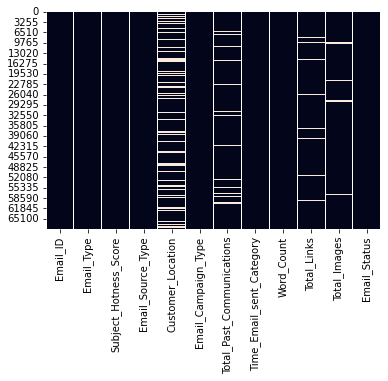

In [ ]:
sns.heatmap(email_campaign_data.isnull(), cbar = False)

#### We came to know about the dataset as follows

 

The dataset given is a dataset from Email marketing. It is Email campaign data and we have to analysis the mail that is ignored; read; acknowledged by the reader


The above dataset has 68353 rows and 12 columns. 

There are no duplicate values in the dataset but four feature have null values. It Will be handled.





## **Understanding Your Variables**

In [ ]:
# Check for any columns of the data
email_campaign_data.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
# Check the description of data
email_campaign_data.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


### Variables Description 

 <b>Email_ID</b> - This column have the email id's of individual customers.

 <b>Email_type</b> - Email type has two categories 1 and 2. We can consider it as  the marketing emails or important updates, notices like business emails.

 <b>Subject_Hotness_Score</b> - This column has the subject-line score on the basis of content efectiveness.

 <b>Email_Source</b> - This column represents the source of the email like sales,marketing or important admin emails related to the Product.

 <b>Email_Campaign_Type</b> - The Campaign type of email.

 <b>Total_Past_Communications</b> - This column shows the number of previous communication from the samme source.

 <b>Customer_Location</b> - Categorical data which explains the different demographic location of the customers.  

 <b>Time_Email_sent_Category</b> - It has 3 categories as 1,2 and 3 which are considered as morning,evening and night time slot.

 <b>Word_Count</b> - It contains the no. of words in the Email.

 <b>Total_Links</b> - This column shows the total number of links in the email sent.

  <b>Total_Images</b> - The total number of images in the email.

 <b>Email_Status</b> - It is the target variable which contains the characterization of the Email that is ignored; read; acknowledged by the reader.

### Check Unique Values for each variable.

In [ ]:
# Check unique values for each variable
for var in email_campaign_data.columns.tolist():
  print("Number of unique values in",var,"is",email_campaign_data[var].nunique(), ".")

Number of unique values in Email_ID is 68353 .
Number of unique values in Email_Type is 2 .
Number of unique values in Subject_Hotness_Score is 51 .
Number of unique values in Email_Source_Type is 2 .
Number of unique values in Customer_Location is 7 .
Number of unique values in Email_Campaign_Type is 3 .
Number of unique values in Total_Past_Communications is 64 .
Number of unique values in Time_Email_sent_Category is 3 .
Number of unique values in Word_Count is 151 .
Number of unique values in Total_Links is 37 .
Number of unique values in Total_Images is 45 .
Number of unique values in Email_Status is 3 .


## **Data Wrangling**

### Data Wrangling Code

Let's Write the code to make the dataset analysis ready.

First analyze the categorical and numerical columns


In [ ]:
# Creating new dataframe having only categorical columns
emails_categorical_data = email_campaign_data.select_dtypes(include =['object','int']).copy()

# Dropping Word_Count because it's numeric data
emails_categorical_data.drop('Word_Count',axis=1,inplace=True)

# Check the categorical data
emails_categorical_data.head()

,Email_ID,Email_Type,Email_Source_Type,Customer_Location,Email_Campaign_Type,Time_Email_sent_Category,Email_Status
0,EMA00081000034500,1,2,E,2,1,0
1,EMA00081000045360,2,1,NaN,2,2,0
2,EMA00081000066290,2,1,B,3,2,1
3,EMA00081000076560,1,2,E,2,2,0
4,EMA00081000109720,1,2,C,3,2,0


In [ ]:
# Let's creat a table having Values,	Total Count,	Total Count Excluding Null,	Missing Value and	Missing %
emails_categorical_data_stats = pd.DataFrame(columns = ['Column', 'Values', 'Total Count', 'Total Count Excluding Null', 
                                       'Missing Value', 'Missing %'])
tmp = pd.DataFrame()

for col in emails_categorical_data.columns:
    tmp['Column'] = [col]
    tmp['Values'] = [emails_categorical_data[col].unique()]
    tmp['Total Count'] = len(list(emails_categorical_data[col].unique()))
    tmp['Total Count Excluding Null'] = int(emails_categorical_data[col].nunique())
    tmp['Missing Value'] = emails_categorical_data[col].isnull().sum()
    tmp['Missing %'] = (emails_categorical_data[col].isnull().sum()/ len(emails_categorical_data)).round(4)*100
    emails_categorical_data_stats = emails_categorical_data_stats.append(tmp)
    
emails_categorical_data_stats

,Column,Values,Total Count,Total Count Excluding Null,Missing Value,Missing %
0,Email_ID,"[EMA00081000034500, EMA00081000045360, EMA0008...",68353,68353,0,0.00
0,Email_Type,"[1, 2]",2,2,0,0.00
0,Email_Source_Type,"[2, 1]",2,2,0,0.00
0,Customer_Location,"[E, nan, B, C, G, D, F, A]",8,7,11595,16.96
0,Email_Campaign_Type,"[2, 3, 1]",3,3,0,0.00
0,Time_Email_sent_Category,"[1, 2, 3]",3,3,0,0.00
0,Email_Status,"[0, 1, 2]",3,3,0,0.00


In [ ]:
# Now Create a new dataframe for numerical columns
emails_numerical_data = email_campaign_data.select_dtypes(include =['float']).copy()

# Add word count
emails_numerical_data['Word_Count'] = email_campaign_data.loc[emails_numerical_data.index, 'Word_Count'].copy()

# Let's check
emails_numerical_data.head()

,Subject_Hotness_Score,Total_Past_Communications,Total_Links,Total_Images,Word_Count
0,2.2,33.0,8.0,0.0,440
1,2.1,15.0,5.0,0.0,504
2,0.1,36.0,5.0,0.0,962
3,3.0,25.0,16.0,0.0,610
4,0.0,18.0,4.0,0.0,947


In [ ]:
# Checking Shape of the dependent variable Email_Status
print("No. of Emails as 0 is =",len(email_campaign_data[email_campaign_data['Email_Status']==0]))
print("No. of Emails as 1 is =",len(email_campaign_data[email_campaign_data['Email_Status']==1]))
print("No. of Emails as 2 is =",len(email_campaign_data[email_campaign_data['Email_Status']==2]))


No. of Emails as 0 is = 54941
No. of Emails as 1 is = 11039
No. of Emails as 2 is = 2373


In [ ]:
# Check Email Status data groupby on Email Type
pd.DataFrame(email_campaign_data.groupby('Email_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Type,Email_Status,Count
0,1,0,39004
1,1,1,8208
2,1,2,1654
3,2,0,15937
4,2,1,2831
5,2,2,719


In [ ]:
# Check Email Status data groupby on Email Source Type
pd.DataFrame(email_campaign_data.groupby('Email_Source_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Source_Type,Email_Status,Count
0,1,0,29577
1,1,1,6150
2,1,2,1422
3,2,0,25364
4,2,1,4889
5,2,2,951


In [ ]:
# Getting Unique Customer Location 
print(email_campaign_data['Customer_Location'].unique())
print(" ")
# Getting Unique Customer Location  Count
print("Customer_Location Count is ",email_campaign_data['Customer_Location'].nunique(),".")

['E' nan 'B' 'C' 'G' 'D' 'F' 'A']
 
Customer_Location Count is  7 .


In [ ]:
# Check Email Status data groupby on customer location
pd.DataFrame(email_campaign_data.groupby('Customer_Location')['Email_Status'].value_counts().reset_index(name="Count"))

,Customer_Location,Email_Status,Count
0,A,0,1160
1,A,1,245
2,A,2,49
3,B,0,3502
4,B,1,714
5,B,2,125
6,C,0,4654
7,C,1,890
8,C,2,214
9,D,0,5950


In [ ]:
# Check Email Status data groupby on Email Campaign Type
pd.DataFrame(email_campaign_data.groupby('Email_Campaign_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Campaign_Type,Email_Status,Count
0,1,1,486
1,1,2,173
2,1,0,77
3,2,0,42115
4,2,1,5446
5,2,2,712
6,3,0,12749
7,3,1,5107
8,3,2,1488


In [ ]:
# Email Status data groupby on Email sent Category
pd.DataFrame(email_campaign_data.groupby('Time_Email_sent_Category')['Email_Status'].value_counts().reset_index(name="Count"))

,Time_Email_sent_Category,Email_Status,Count
0,1,0,10970
1,1,1,2186
2,1,2,480
3,2,0,33062
4,2,1,6631
5,2,2,1436
6,3,0,10909
7,3,1,2222
8,3,2,457


### We found following manipulations and insights as follows.

As we can see we have 17% missing values in Customer Location.

There is no missing values in any other categorical variable.

Email_Type and Email_Source_Type have 2 categories.

Email_Campaign_Type,Time_Email_sent_Category and Email_Status have 3 Categories

Look at the Variable 'Customer_Location' -- distinct categories are 8 including one 'nan'

No. of ignored Emails is highest as 54941

No. of Emails read by customer is  11039

No. of Acknowledge Emails is  2373

Email Type 1 has higher read (8208) and acknowledged (1654) by reader

Email source Type 1 has higher read (6150) and acknowledged (1422) by reader


Email Campaign Type 2 has high read (5446) and type 3 has high acknowledged (1488) by reader



## **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#### Pie Chart analysis on Dependant Variable

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64
 


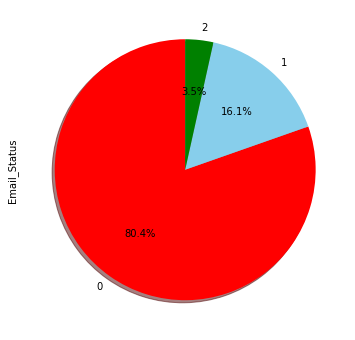

In [ ]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(email_campaign_data.Email_Status.value_counts())
print(" ")

# Dependant Variable Column Visualization
email_campaign_data['Email_Status'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['0','1','2'],
                               colors=['red','skyblue','green'],
                               explode=[0,0,0]
                              )

A pie chart is a type of graph that represents the data in the circular graph. The slices of pie show the relative size of the data, and it is a type of pictorial representation of data.

It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### As we can see there is 80.4% of mails ignored, 16.1% emails read and only 3.5% mails acknowledged by the reader.

we will see the factors affecting the above data

#### Customer location visualization

G    23173
E    10193
D     7406
C     5758
F     4433
B     4341
A     1454
Name: Customer_Location, dtype: int64
 


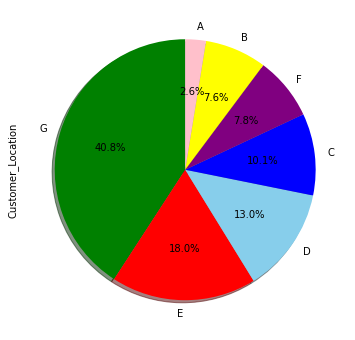

In [ ]:
# Customer location Column Value Counts
print(email_campaign_data.Customer_Location.value_counts())
print(" ")

# Customer location Variable Column Visualization
email_campaign_data['Customer_Location'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['G','E','D','C','F','B','A'],
                               colors=['green','red','skyblue','blue','purple','yellow','pink'],
                               explode=[0,0,0,0,0,0,0]
                              )

Most of the Emails has sent to G location

#### Let's visualize emails_categorical_data

In [ ]:
# Drop Email_ID column as it has indivisual Email Id's of the customer
emails_categorical_data.drop('Email_ID',axis=1,inplace=True)

In [ ]:
def barPlotPerc(data, xVar, ax):
    '''
    This barPlot Add percentage for hues to bar plots
    args as follows:
        data: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in email_campaign_data[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 7 X categories, 3 hues =>
        ##    [0, 8, 16] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

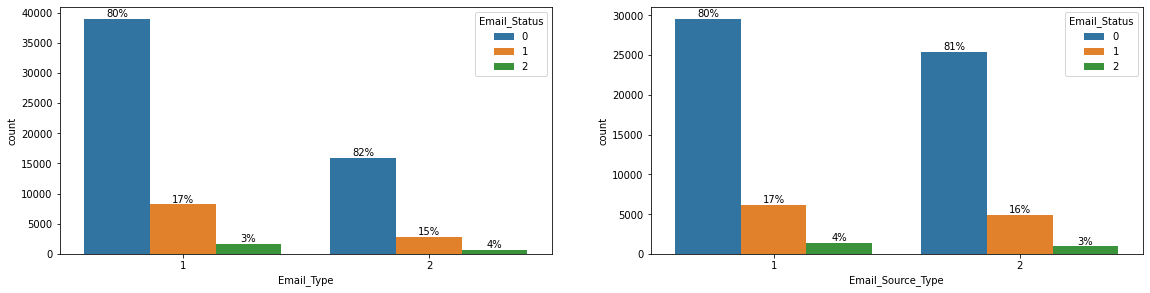

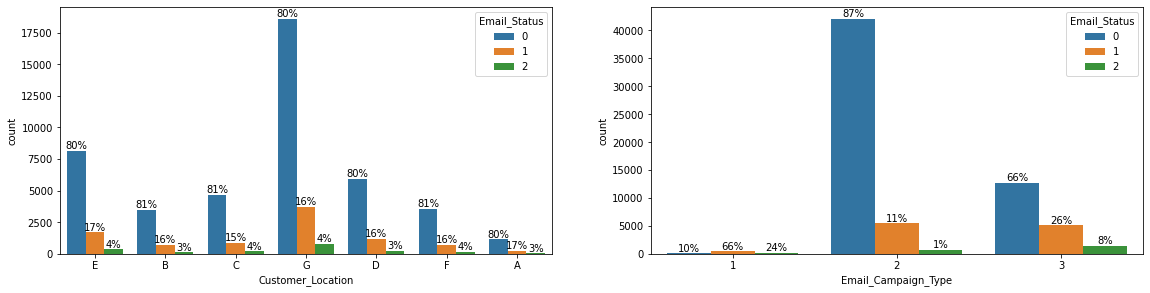

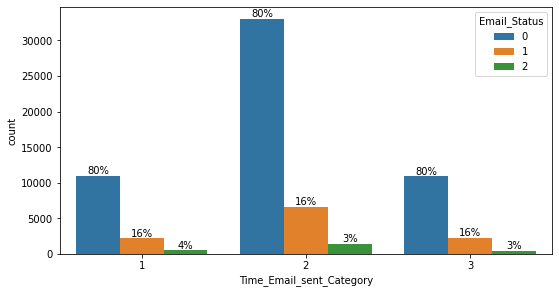

<Figure size 2160x720 with 0 Axes>

In [ ]:
ix = 1
fig = plt.figure(figsize = (30,10))
for c in list(emails_categorical_data.columns):
    if ix < 3:
        if c != 'Email_Status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = emails_categorical_data, x=c,hue='Email_Status' ,ax = ax1)
            barPlotPerc(emails_categorical_data,c,ax1)            
    ix = ix +1
    if ix == 3: 
        fig = plt.figure(figsize = (30,10))
        ix =1

As we can observe the distribution of Email_Status is almost similar in all the categories except in Email_Campaign_Type 

we can also see that it shows a totally different trend . For Email_Campaign_Type=1 we see that only 10% of customers are ignoring the email and for 2 around 87% customer ignore the emails.

**For getting better acknowledged by the reader email should be written Email Type 2, Email source type 1 and Email campaign type 1(Email campaign type 1 are 10% ignored, 66% read and 24% acknowledged by reader)**

#### Let's visualize emails_numerical_data

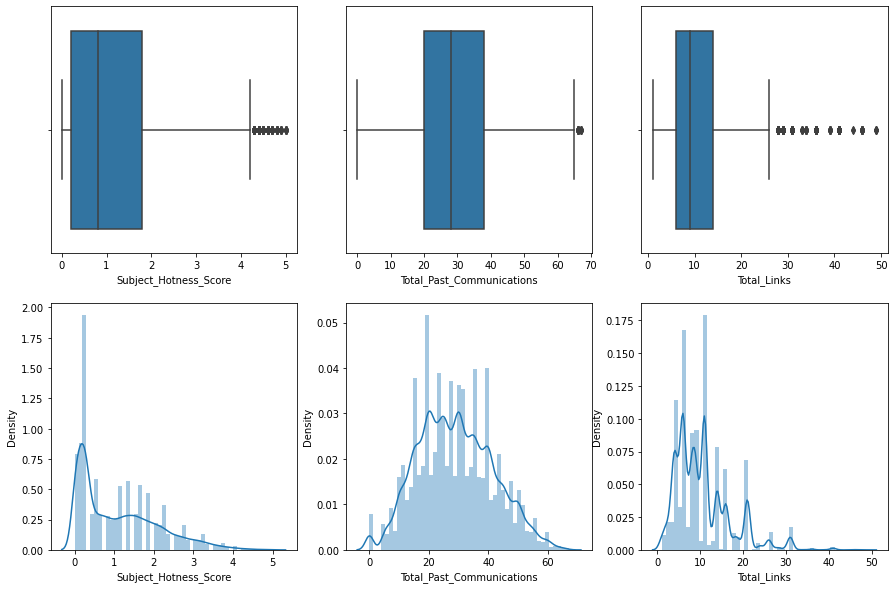

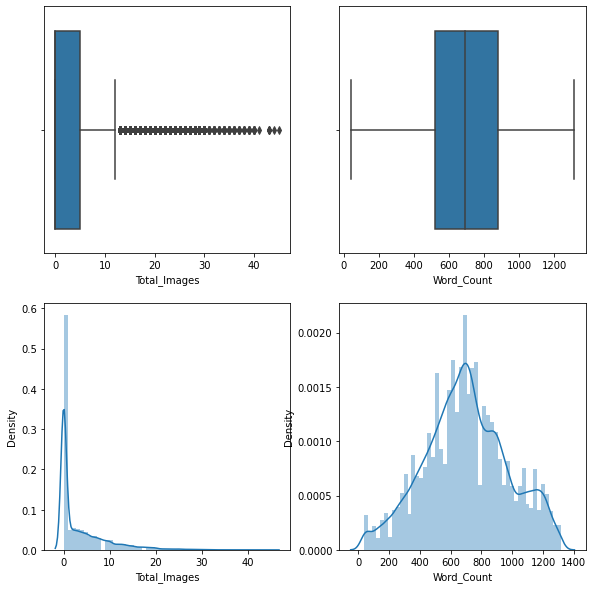

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(emails_numerical_data.columns):
    if ix <= 3:
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data = emails_numerical_data, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.distplot(emails_numerical_data[c], ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

There are outliers in Subject_Hotness_Score,Total_Links and Total_Images and the distribution of these features are right skewed in nature. 

There are also a few outliers in Total_Past_Communication which has a normal distribution .



#### Let's analyze with box plot according to Email status type

Lets look at the relationship between the dependent variable and independent variable. In order to do that let's add our dependent variable to this dataset.

In [ ]:
emails_numerical_data['Email_Status'] = email_campaign_data.loc[emails_numerical_data.index, 'Email_Status'].copy()

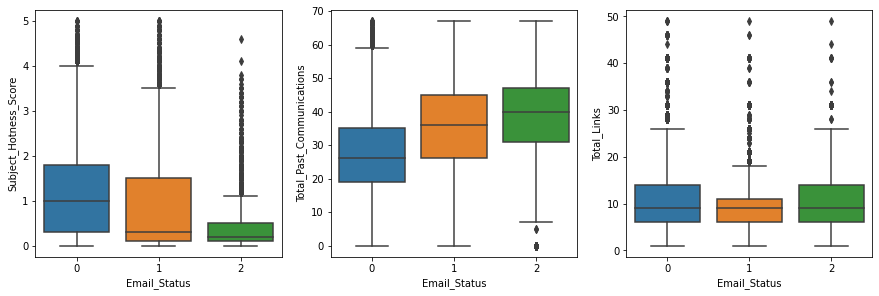

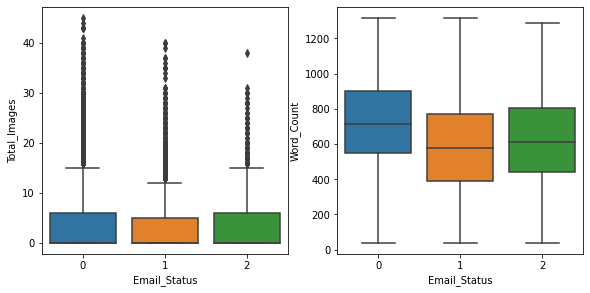

<Figure size 1080x720 with 0 Axes>

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(emails_numerical_data.columns):
    if ix <= 3:
        if c != 'Email_Status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data=emails_numerical_data, x='Email_Status', y=c, ax=ax1)        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum. In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median.

**Subject_Hotness_Score**  All Email_Status i.e 0, 1, 2 have outliers. 0 have highest median and 1, 2 are right skewed. It is observed that the Subject_Hotness_Score for read/acknowledged mails are much lower.

**Total_Past_Communications** 0, 2 have outliers and 2 have highest median .

**Total_Links** 0, 1, 2 all have outliers,All have the same median but 0,2 have higher variance compare to 1.

**Total_Images**  0, 1, 2 all have outliers and All have the same median. Hence all the mails have the same range of images.

**Word_Count** Median of 0 is highest. Thus we can understand that ignored mails have higher word count.


####  Correlation Heat map

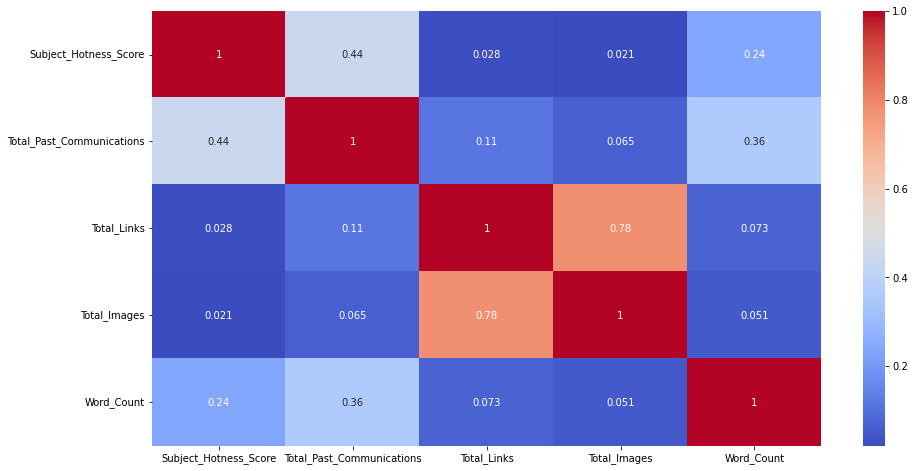

In [ ]:
# Correlation
plt.figure(figsize=(15,8))
correlation = emails_numerical_data.drop('Email_Status',axis=1).corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

We can observe that there is a relationship between <b>Total_Images</b> and <b>Total_Links</b>, they have <b>78% positive correlation</b>. To understand if this relation holds true, we try and validate with a lmplot b/w the two features.

#### SNS Lmplot analysis

The lineplot (lmplot) is one of the most basic plots. It shows a line on a two dimensional plane. You can plot it with seaborn or matlotlib depending on your preference.  This method is used to draw a scatter plot onto a FacetGrid

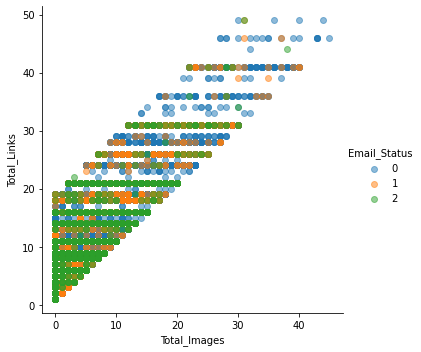

In [ ]:
sns.lmplot(x='Total_Images', y='Total_Links', hue='Email_Status', data=email_campaign_data, fit_reg=False, scatter_kws={'alpha':0.5})

We can conclude from the above information that there is a high positive correlation between these two features. Lets now understand each feature individually.

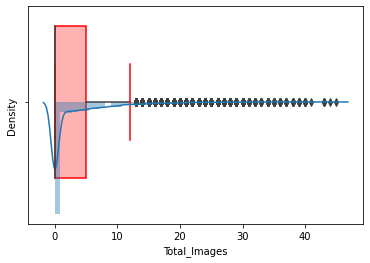

In [ ]:
ax=sns.boxplot(emails_numerical_data['Total_Images'],capprops=dict(color="red"),boxprops=dict(facecolor="red", color="red"))
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.distplot(emails_numerical_data['Total_Images'])


More than 50% of values are 0 and there is a presence of outliers in Total_Images



In [ ]:
# Finding number of data having 0 images
img_cnt_0 = emails_numerical_data[emails_numerical_data['Total_Images']==0].count()['Total_Images']

# Total number of non nan data
total = emails_numerical_data['Total_Images'].count()

# Finding percentage
pcnt_img_0=(img_cnt_0/total)*100
print("Percentage of data having Total_Images Zero is = ",pcnt_img_0)

Percentage of data having Total_Images Zero is =  52.58263843061971


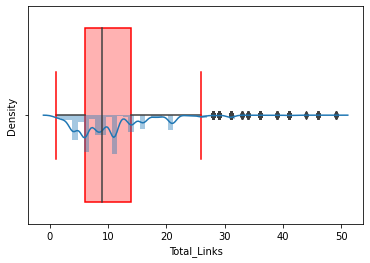

In [ ]:
# Visualize Total_Links
ax=sns.boxplot(emails_numerical_data['Total_Links'],capprops=dict(color="red"),boxprops=dict(facecolor="red", color="red"))
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.distplot(emails_numerical_data['Total_Links'])


Compared to Total_Images, Total_Links has very few outliers.

**Since images and links are correlated and most of the values in Total_Images is 0 we will combine both the features.**

Before that we need to see if there is any null values in this column .



In [ ]:
# Number of NaNs for each object
email_campaign_data.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

Since there are null values we need to impute them individually after that we can combine Total_Links and Total_Images

## **Feature Engineering & Data Pre-processing**

###  Handling Missing Values

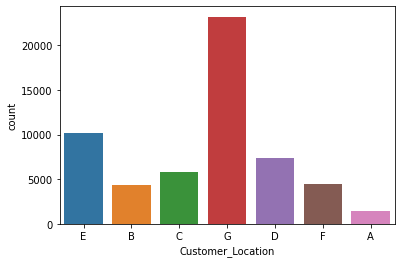

In [ ]:
# Visualizing Customer_Location
sns.countplot(email_campaign_data['Customer_Location'])

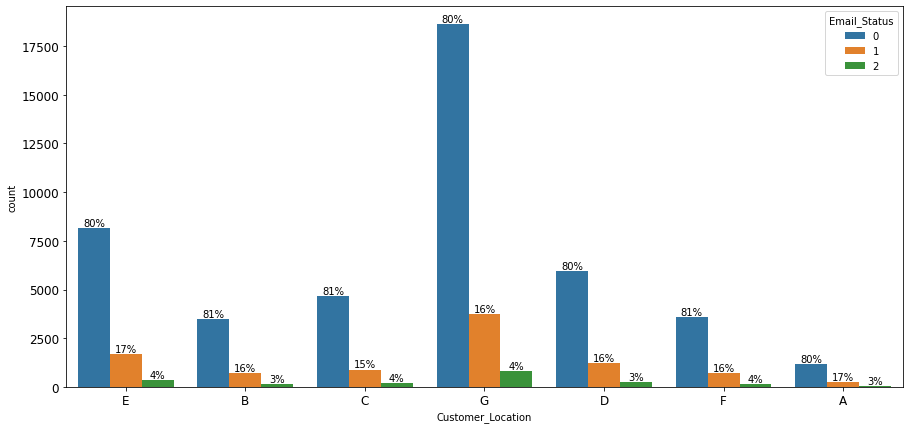

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(email_campaign_data['Customer_Location'],hue=email_campaign_data['Email_Status'])
plt.xticks(size=12)
plt.yticks(size=12)
barPlotPerc(email_campaign_data,'Customer_Location',ax)

As we can see irrespective of location the ratio of <b>Email_Status</b> is same throughout .So <b>we can drop the location column

In [ ]:
# check the shape
print('Shape of data before dropping ',email_campaign_data.shape)

# Dropping Customer_Location column
email_campaign_data.drop('Customer_Location',inplace=True,axis=1)
print('Shape of data after dropping ',email_campaign_data.shape)

Shape of data before dropping  (68353, 12)
Shape of data after dropping  (68353, 11)


 Lets find out which metrics we should use to fill missing values of Total_Past_Communications column

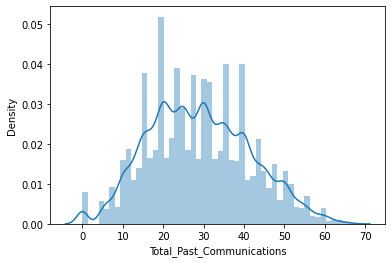

In [ ]:
sns.distplot(email_campaign_data.Total_Past_Communications)

 As we can observe the data is **symmetricaly distributed** so <b>we can use mean value</b> for imputing missing values

In [ ]:
print('Number of missing values before imputing is = ',email_campaign_data['Total_Past_Communications'].isnull().sum())

# Fill the missing values
email_campaign_data['Total_Past_Communications'].fillna(email_campaign_data['Total_Past_Communications'].mean(),inplace=True)

print('Number of missing values after imputing is = ',email_campaign_data['Total_Past_Communications'].isnull().sum())

Number of missing values before imputing is =  6825
Number of missing values after imputing is =  0


 Now lets find out which metrics we should use to fill missing values of Total_Links column





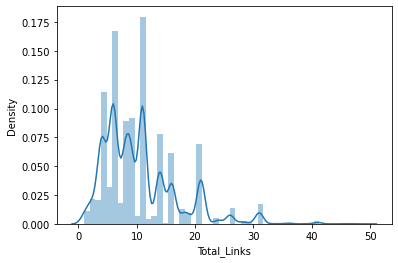

In [ ]:
sns.distplot(email_campaign_data.Total_Links)

 Since the data is **not normally distributed** we will <b>use Mode</b> to impute missing value

In [ ]:
# Filling missing values of Total_Links column
email_campaign_data['Total_Links'].fillna(email_campaign_data['Total_Links'].mode()[0],inplace=True)

print('Number of missing values after imputing is = ',email_campaign_data['Total_Links'].isnull().sum())

Number of missing values after imputing is =  0


 Now lets find out which metrics we should use to fill missing values of Total_Images column

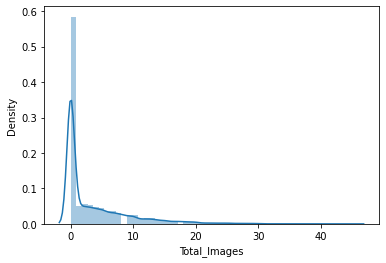

In [ ]:
sns.distplot(email_campaign_data.Total_Images)

 Since the data is **not normally distributed** we will use <b> Mode </b> to impute missing value

In [ ]:
# Filling missing values of Total_Links column
print('Number of missing values before imputing is = ',email_campaign_data['Total_Images'].isnull().sum())
email_campaign_data['Total_Images'].fillna(email_campaign_data['Total_Images'].mode()[0],inplace=True)

print('Number of missing values after imputing is = ',email_campaign_data['Total_Images'].isnull().sum())

Number of missing values before imputing is =  1677
Number of missing values after imputing is =  0


In [ ]:
email_campaign_data.isnull().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

####  Now we have no missing values, So we can combine Links and Images column into one.

In [ ]:
# Combine both
email_campaign_data['Links_Images'] = email_campaign_data['Total_Links']+email_campaign_data['Total_Images']

In [ ]:
# Dropping Total_Images and Total_Links  column
print('Shape of data before dropping ',email_campaign_data.shape)

email_campaign_data.drop(['Total_Images','Total_Links'],inplace=True,axis=1)
print('Shape of data after dropping ',email_campaign_data.shape)

Shape of data before dropping  (68353, 12)
Shape of data after dropping  (68353, 10)


In [ ]:
# Let's check Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(email_campaign_data[[i for i in email_campaign_data.describe().columns if i not in ['Email_ID','Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category','Total_Links','Total_Images','Email_Status']]])

,variables,VIF
0,Subject_Hotness_Score,1.734531
1,Total_Past_Communications,3.430879
2,Word_Count,3.687067
3,Links_Images,2.629047


Here, the VIF is within acceptable limits i.e. VIF<5 . 

Hence multicollinearity is not a major issue for our data.

### Handling Outliers

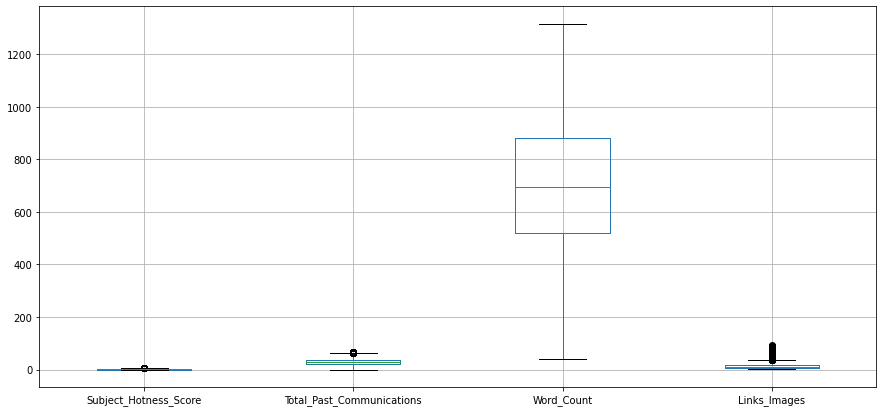

In [ ]:
# Lets find out which all numerical column have outliers using boxplot
plt.figure(figsize=(15,7))
numerical_col=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Links_Images']
email_campaign_data.boxplot(numerical_col)


Except Word_Count column all other numeric column have outliers.

Since our dependent variable is highly imbalanced so before dropping outliers we should check that it will not going to delete more than 5% of minority class which is Email_Status =1,2

{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Links_Images': {0: 3061, 1: 437, 2: 122}}


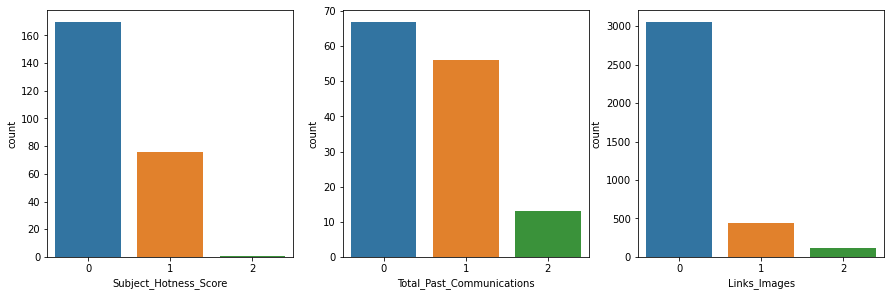

In [ ]:
# Removing Word_Count because it does'nt has outlier
numerical_col.remove('Word_Count')

fig = plt.figure(figsize = (15,10))
ix = 1

#dictionary d to store the count of each email_status 
d={}

#iterating through each column which have outlier
for x in [y for y in numerical_col]:

    #Finding Quartile
    q75,q25 = np.percentile(email_campaign_data.loc[:,x],[75,25])

    #Calculating Inter Quartile Range
    intr_qr = q75-q25
    
    #Fixing Boundaries for outliers
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    
    #list y to store email_status of only outliers
    y=[]
    y=email_campaign_data.loc[email_campaign_data[x] < min]['Email_Status'].tolist()
    y.append(email_campaign_data.loc[email_campaign_data[x] > max]['Email_Status'].tolist()) 
    d[x]={}
    for i in y[0]:
      d[x][i] = d[x].get(i,0) + 1
    ax1 = fig.add_subplot(2,3,ix)
    sns.countplot(y[0],ax=ax1)
    plt.xlabel(x)      
    ix = ix +1
print(d)
  

In [ ]:
# Finding the percentage of minority classs going to be affected by outliers
sum_min=0
sum_maj=0
for x in [y for y in numerical_col]:
  sum_min+=d[x][1]
  sum_min+=d[x][2]
  sum_maj+=d[x][0]
total = email_campaign_data.groupby('Email_Status').count()['Email_Type'][1]+email_campaign_data.groupby('Email_Status').count()['Email_Type'][2]
total_0 = email_campaign_data.groupby('Email_Status').count()['Email_Type'][0]
print("Percentage of majority class having outliers = ",100*sum_maj/total_0)
print("Percentage of minority class having outliers = ",100*sum_min/total)

Percentage of majority class having outliers =  6.002803006861907
Percentage of minority class having outliers =  5.256486728303012


#### Since more than 5% of minority classes will be removed if we delete outliers and we don't want that so we will keep it as it is.

In [ ]:
# Dropping Email_ID column
print('Shape of data before dropping ',email_campaign_data.shape)

email_campaign_data.drop('Email_ID',inplace=True,axis=1)
print('Shape of data after dropping ',email_campaign_data.shape)

Shape of data before dropping  (68353, 10)
Shape of data after dropping  (68353, 9)


Now we are done with outlier treatment and missing value imputation lets move on to our dependent variable

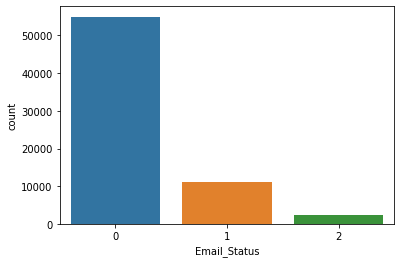

In [ ]:
sns.countplot(email_campaign_data['Email_Status'])

In [ ]:
email_campaign_data.groupby('Email_Status').count()['Email_Type']

Email_Status
0    54941
1    11039
2     2373
Name: Email_Type, dtype: int64

#### <b> Dependent variable is highly imbalanced </b> . Before treating that lets normalize our data

### Feature Normalization


In [ ]:
# Apply normalization techniques
numerical_col=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Links_Images']
for column in numerical_col:
  email_campaign_data[column] = (email_campaign_data[column] - email_campaign_data[column].min()) / (email_campaign_data[column].max() - email_campaign_data[column].min()) 

In [ ]:
email_campaign_data.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Links_Images
0,1,0.44,2,2,0.492537,1,0.313480,0,0.076087
1,2,0.42,1,2,0.223881,2,0.363636,0,0.043478
2,2,0.02,1,3,0.537313,2,0.722571,1,0.043478
3,1,0.60,2,2,0.373134,2,0.446708,0,0.163043
4,1,0.00,2,3,0.268657,2,0.710815,0,0.032609


Lets visualize our normalized data

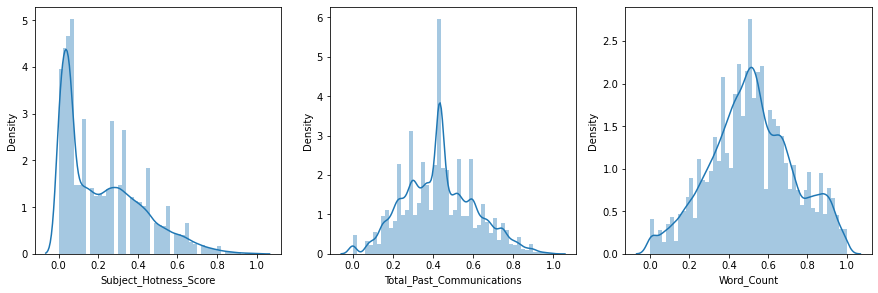

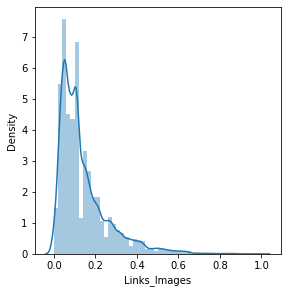

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in numerical_col:
    if ix <= 3:
            ax1 = fig.add_subplot(2,3,ix)
            sns.distplot(email_campaign_data[c], ax=ax1)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

#### Now we are done with scaling, it's time to perform one-hot encoding on our categorical data.

###  Categorical Encoding

Use One hot encoding

In [ ]:
email_campaign_data.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Links_Images
0,1,0.44,2,2,0.492537,1,0.313480,0,0.076087
1,2,0.42,1,2,0.223881,2,0.363636,0,0.043478
2,2,0.02,1,3,0.537313,2,0.722571,1,0.043478
3,1,0.60,2,2,0.373134,2,0.446708,0,0.163043
4,1,0.00,2,3,0.268657,2,0.710815,0,0.032609


In [ ]:
cat_col=['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category']
email_campaign_data=pd.get_dummies(email_campaign_data, columns=cat_col)
email_campaign_data.drop('Email_Type_2',axis=1,inplace=True) #Since they have binary category
email_campaign_data.drop('Email_Source_Type_2',axis=1,inplace=True)

In [ ]:
# Pushing Email_Status at last of the DataFrame
list_of_col=list(email_campaign_data.columns)
list_of_col.remove('Email_Status')
list_of_col.append('Email_Status')
list_of_col
email_campaign_data=email_campaign_data[list_of_col]
email_campaign_data.head(2)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Links_Images,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Email_Status
0,0.44,0.492537,0.313480,0.076087,1,0,0,1,0,1,0,0,0
1,0.42,0.223881,0.363636,0.043478,0,1,0,1,0,0,1,0,0


One-hot encoding in machine learning is the conversion of categorical information into a format that may be fed into machine learning algorithms to improve prediction accuracy. One-hot encoding is a common method for dealing with categorical data in machine learning.


###  Feature Manipulation & Selection

#### 1. Feature Manipulation

Created new feature links_images.

#### 2. Feature Selection

Get the features importance then select the required features and drop the rest

In [ ]:
def compute_impurity(feature):
    """
    This function calculates impurity of a feature.
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    impurity = -1 * np.sum(np.log2(probs) * probs)   
    return(round(impurity, 3))


In [ ]:
def comp_feature_information_gain(df, target, descriptive_feature):
    """
    This function calculates information gain for splitting on 
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy'
    """
    target_entropy = compute_impurity(df[target])

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target])
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    
    
    information_gain = target_entropy - feature_remaining_impurity
    

    return(information_gain)

Subject_Hotness_Score : 0.03815999999999997
Total_Past_Communications : 0.08543499999999993
Word_Count : 0.04493199999999986
Links_Images : 0.023570999999999898
Email_Type_1 : 0.00040000000000006697
Email_Source_Type_1 : 4.899999999996574e-05
Email_Campaign_Type_1 : 0.017567
Email_Campaign_Type_2 : 0.050541999999999976
Email_Campaign_Type_3 : 0.03729300000000002
Time_Email_sent_Category_1 : -0.0008010000000000517
Time_Email_sent_Category_2 : -0.0006019999999999914
Time_Email_sent_Category_3 : 0.0


Text(0.5, 1.0, 'Feature Importance')

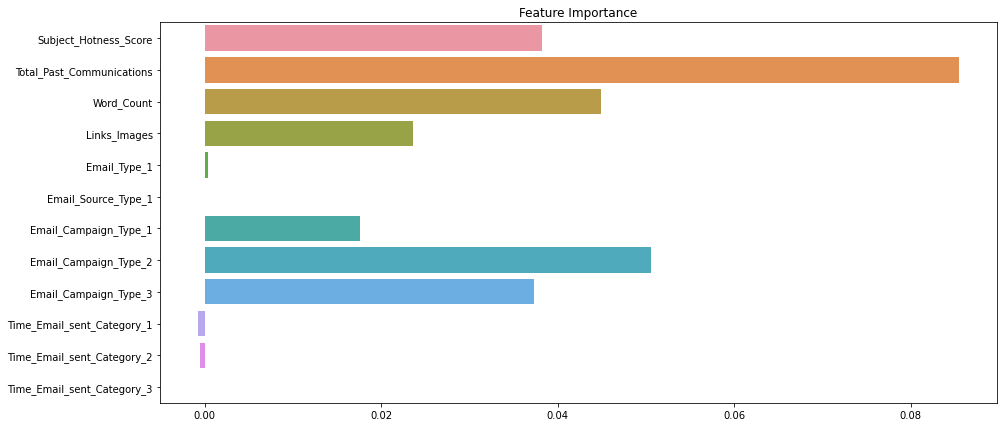

In [ ]:
info_gain={}
for feature in email_campaign_data.drop(columns='Email_Status').columns:
    feature_info_gain = comp_feature_information_gain(email_campaign_data, 'Email_Status', feature)
    info_gain[feature]=feature_info_gain
    print(feature, ':', feature_info_gain)
keys = list(info_gain.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(info_gain[k]) for k in info_gain]
plt.figure(figsize=(15,7))
sns.barplot(y=keys, x=vals)
plt.title('Feature Importance')

We can see that Time_Email_sent_Category_1, Time_Email_sent_Category_2, Time_Email_sent_Category_3 have very less importance we can drop this feature.

In [ ]:
drop=['Time_Email_sent_Category_1','Time_Email_sent_Category_2','Time_Email_sent_Category_3']
email_campaign_data.drop(drop,inplace=True,axis=1)

In [ ]:
email_campaign_data.head()

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Links_Images,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Email_Status
0,0.44,0.492537,0.313480,0.076087,1,0,0,1,0,0
1,0.42,0.223881,0.363636,0.043478,0,1,0,1,0,0
2,0.02,0.537313,0.722571,0.043478,0,1,0,0,1,1
3,0.60,0.373134,0.446708,0.163043,1,0,0,1,0,0
4,0.00,0.268657,0.710815,0.032609,1,0,0,0,1,0


Now we are done with feature selection lets move to data imbalance handling.

#### Imbalance Handling

Random Under Sampling

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(email_campaign_data.iloc[:,0:-1], email_campaign_data['Email_Status'])

print('Original dataset shape:', len(email_campaign_data))
print('Resampled dataset shape', len(y_rus))

Original dataset shape: 68353
Resampled dataset shape 7119


Text(0.5, 1.0, 'Before Undersampling')

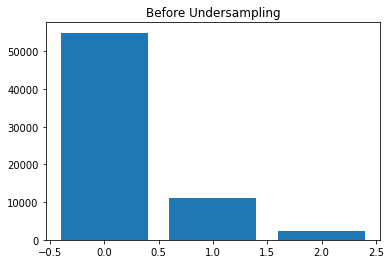

In [ ]:
plt.bar(Counter(email_campaign_data['Email_Status']).keys(), Counter(email_campaign_data['Email_Status']).values())
plt.title("Before Undersampling")

Text(0.5, 1.0, 'After Undersampling')

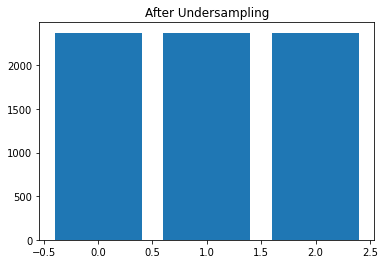

In [ ]:
plt.bar(Counter(y_rus).keys(), Counter(y_rus).values())
plt.title("After Undersampling")

In [ ]:
unique_elements, counts_elements = np.unique(y_rus, return_counts=True)
print("Frequency of unique values of the Email_Status:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the Email_Status:
[[   0    1    2]
 [2373 2373 2373]]


 Now we have a <b>total balanced data with 2373 records for each class.

###  Data Splitting

In [ ]:
X_train_fs, X_test_fs, y_train, y_test = train_test_split(x_rus, y_rus, test_size = 0.2, random_state = 3,stratify=y_rus)

* Taking a 80-20 train test split.
* We need to use the stratify parameter inorder to make sure that the train and test datasets have the same ratios of the predictor variables.

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

So in this case I have taken 80:20 ratio.

## **ML Model Implementation**

## **Decision Tree Model**


In [ ]:
# Initializing the DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()

In [ ]:
# Fitting onto the train set
decision_tree_classifier.fit(X_train_fs,y_train)

DecisionTreeClassifier()

In [ ]:
#Creating dataframe for storing model evaluated metrics.
column_name = ['Model Name','F1_Score_Train','Precision_Train','Recall_Train','Accuracy_Train','ROC_AUC_Train',
                           'F1_Score_Test','Precision_Test','Recall_Test','ACCURACY_Test','ROC_AUC_Test']

All_model=pd.DataFrame(columns=column_name)

In [ ]:
def evaluate(model,X_train,y_train,X_test,y_test,model_name):
  '''Function for evaluating all the models'''
  global column_name
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)

  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)
  test_preds = model.predict_proba(X_test)

  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(y_train,train_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)

  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(y_train,train_class_preds)
  test_cm = confusion_matrix(y_test,test_class_preds )


  # Get the Recall for train and test
  train_recall = recall_score(y_train, train_class_preds, average='weighted')
  test_recall = recall_score(y_test, test_class_preds, average='weighted')

  # Get the precision for train and test
  train_precision = precision_score(y_train, train_class_preds, average='weighted')
  test_precision = precision_score(y_test, test_class_preds, average='weighted')

  # Get the f1 Score for train and test
  train_f1score = f1_score(y_train, train_class_preds, average='weighted')
  test_f1score = f1_score(y_test, test_class_preds, average='weighted')

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(y_train,train_preds,multi_class = 'ovr')
  test_auc = roc_auc_score(y_test,test_preds,multi_class = 'ovr')

  list_score=[model_name,train_f1score,train_precision,train_recall,train_accuracy,train_auc,test_f1score,test_precision,test_recall,test_accuracy,test_auc]
  res = {column_name[i]: list_score[i] for i in range(len(column_name))}
  

  print("----- Evaluation on train data -----\n")
  print("Confusion matrix \n")
  print(train_cm)
  print("\n Accuracy = ",train_accuracy)
  print("\n Recall = ",train_recall)
  print("\n Precision = ",train_precision)
  print("\n F1 score = ",train_f1score)
  print("\n Roc_Auc score = ",train_auc)

  print("\n\n----- Evaluation on test data -----\n")
  print("Confusion matrix \n")
  print(test_cm)
  print("\n Accuracy = ",test_accuracy)
  print("\n Recall = ",test_recall)
  print("\n Precision = ",test_precision)
  print("\n F1 score = ",test_f1score)
  print("\n Roc_Auc score = ",test_auc)

  fpr = {}
  tpr = {}
  thresh ={}
  n_class=3
  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend()
  return res

In [ ]:
final_list=[]

----- Evaluation on train data -----

Confusion matrix 

[[1898    0    0]
 [   0 1898    1]
 [   0    4 1894]]

 Accuracy =  0.9991220368744512

 Recall =  0.9991220368744512

 Precision =  0.9991228667313098

 F1 score =  0.9991220361436879

 Roc_Auc score =  0.9999983813505406


----- Evaluation on test data -----

Confusion matrix 

[[255 132  88]
 [103 220 151]
 [115 138 222]]

 Accuracy =  0.48946629213483145

 Recall =  0.48946629213483145

 Precision =  0.48991321358276235

 F1 score =  0.4896116820378507

 Roc_Auc score =  0.6167089621632256


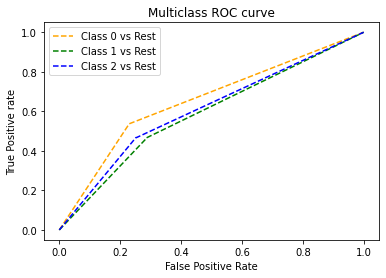

In [ ]:
# Evaluation of our decision tree model
res = evaluate(decision_tree_classifier,X_train_fs,y_train,X_test_fs,y_test,'Decision_Tree_On_Under_Sampled_data')
final_list.append(res)

### We can observe that model is overfitting since it's performing really well on training set but not that good on unseen data. Lets find what can be the reason by implimenting other algorithm.

## **SVM Model**

In [ ]:
from sklearn.svm import SVC
support_vector = SVC(probability=True)

# Fitting on the train set
support_vector.fit(X_train_fs,y_train)

SVC(probability=True)

----- Evaluation on train data -----

Confusion matrix 

[[1346  188  364]
 [ 636  390  873]
 [ 333  246 1319]]

 Accuracy =  0.5364354697102721

 Recall =  0.5364354697102721

 Precision =  0.5235802182547129

 F1 score =  0.5058614584700288

 Roc_Auc score =  0.7221292499018039


----- Evaluation on test data -----

Confusion matrix 

[[326  39 110]
 [156  94 224]
 [103  63 309]]

 Accuracy =  0.511938202247191

 Recall =  0.511938202247191

 Precision =  0.5058239650387089

 F1 score =  0.48296339920933534

 Roc_Auc score =  0.7021840530775213


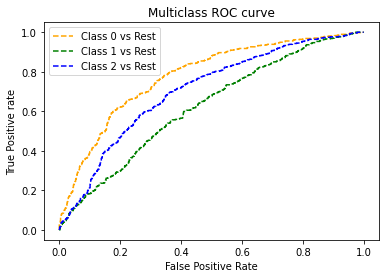

In [ ]:
# Evaluating the SVM Model
res = evaluate(support_vector,X_train_fs,y_train,X_test_fs,y_test,'SVM_On_Under_Sampled_Data')
final_list.append(res)

### So <b>SVM</b> is not overfitting and the previous model which was <b>Decision Tree</b> was overfitted because of the depth of the tree , but still SVM is not giving good results lets hypertune it to get the best parameters .

## **Hypertuning SVM Model**

In [ ]:
# defining parameter range
parameter_grid = {'C': [0.1, 100], 
              'gamma': [1, 0.1],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(probability=True), parameter_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_fs, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   6.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.536 total time=   6.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   6.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.525 total time=   6.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   6.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.498 total time=   7.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   7.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.492 total time=   6.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.491 total time=   6.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   7.1s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.533 total time=  12.3s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;,

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 100], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1, probability=True)


----- Evaluation on train data -----

Confusion matrix 

[[1384  209  305]
 [ 619  525  755]
 [ 302  291 1305]]

 Accuracy =  0.5643546971027217

 Recall =  0.5643546971027217

 Precision =  0.5548011845756396

 F1 score =  0.5432740648547688

 Roc_Auc score =  0.7451954107466846


----- Evaluation on test data -----

Confusion matrix 

[[335  56  84]
 [147 126 201]
 [101  84 290]]

 Accuracy =  0.5273876404494382

 Recall =  0.5273876404494382

 Precision =  0.5175795043127296

 F1 score =  0.5088487157610052

 Roc_Auc score =  0.7067386874971772


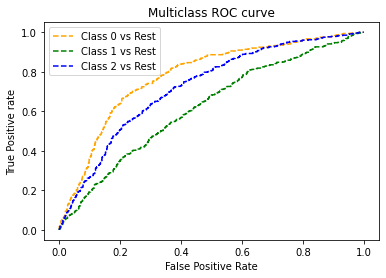

In [ ]:
# Evaluating the tuned model
res=evaluate(grid,X_train_fs,y_train,X_test_fs,y_test,'Hypertuned_SVM_On_Under_Sampled_data')
final_list.append(res)

### We get better results from previously but still it's not good , it's because of loss of information due to under sampling lets try different sampling techniques and than apply model.

## Synthetic Minority Oversampling Technique (SMOTE)


This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.



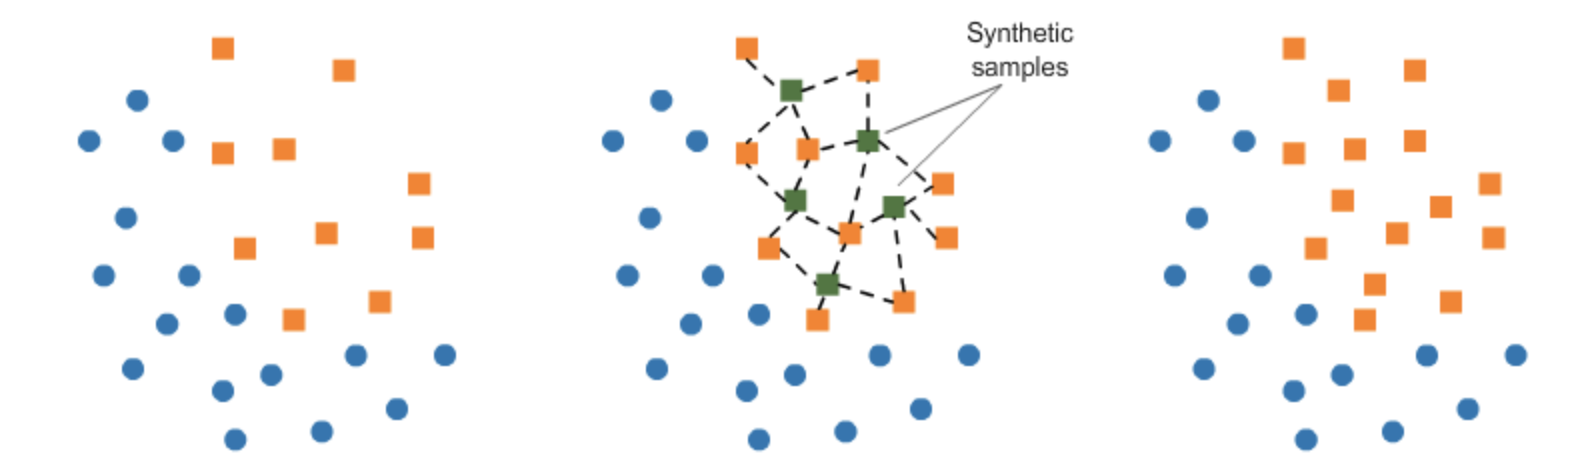

In [ ]:
email_campaign_data.head()

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Links_Images,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Email_Status
0,0.44,0.492537,0.313480,0.076087,1,0,0,1,0,0
1,0.42,0.223881,0.363636,0.043478,0,1,0,1,0,0
2,0.02,0.537313,0.722571,0.043478,0,1,0,0,1,1
3,0.60,0.373134,0.446708,0.163043,1,0,0,1,0,0
4,0.00,0.268657,0.710815,0.032609,1,0,0,0,1,0


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(email_campaign_data.iloc[:,0:-1], email_campaign_data['Email_Status'])

print('Original dataset shape', len(email_campaign_data))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 68353
Resampled dataset shape 164823


Text(0.5, 1.0, 'Before SMOTE')

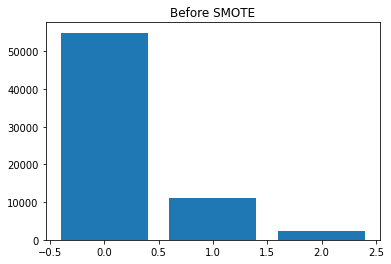

In [ ]:
plt.bar(Counter(email_campaign_data['Email_Status']).keys(), Counter(email_campaign_data['Email_Status']).values())
plt.title("Before SMOTE")

Text(0.5, 1.0, 'After SMOTE')

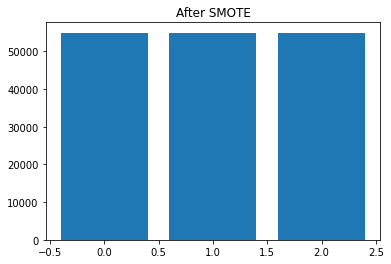

In [ ]:
plt.bar(Counter(y_smote).keys(), Counter(y_smote).values())
plt.title("After SMOTE")

In [ ]:
unique_elements, counts_elements = np.unique(y_smote, return_counts=True)
print("Frequency of unique values of the Email_Status:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the Email_Status:
[[    0     1     2]
 [54941 54941 54941]]


#### Now we have a <b>total balanced data with 54941 records for each class.

In [ ]:
#Split data into train and test
X_train_fs, X_test_fs, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3,stratify=y_smote)

### We are ready with our data lets try our baseline model Decision Tree and see the difference.

## **Decision Tree**

In [ ]:
# Fit the decision tree model
decision_tree_classifier_smote = DecisionTreeClassifier()
decision_tree_classifier_smote.fit(X_train_fs,y_train)

DecisionTreeClassifier()

----- Evaluation on train data -----

Confusion matrix 

[[43951     2     0]
 [  111 43841     1]
 [   32    31 43889]]

 Accuracy =  0.9986576468625339

 Recall =  0.9986576468625339

 Precision =  0.9986606534326185

 F1 score =  0.998657861512579

 Roc_Auc score =  0.9999980075150493


----- Evaluation on test data -----

Confusion matrix 

[[8803 1740  445]
 [1516 8072 1400]
 [ 381 1153 9455]]

 Accuracy =  0.7987259214318216

 Recall =  0.7987259214318216

 Precision =  0.7985333102101684

 F1 score =  0.7985265516670585

 Roc_Auc score =  0.8496514702470673


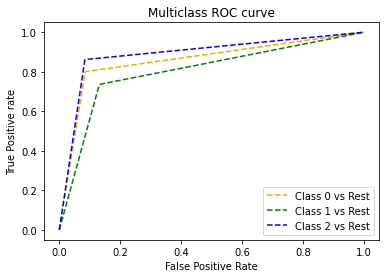

In [ ]:
# Evaluate the results
res=evaluate(decision_tree_classifier_smote,X_train_fs,y_train,X_test_fs,y_test,'Decision_Tree')
final_list.append(res)

### We can observe the results are better on this data compare to Under Sample Data.

## **XGBoost**

In [ ]:
xgb_model = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)

In [ ]:
# Fit the model
xgb_model.fit(X_train_fs,y_train)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

----- Evaluation on train data -----

Confusion matrix 

[[42396  1243   314]
 [ 4364 34827  4762]
 [  745   920 42287]]

 Accuracy =  0.9063538048506727

 Recall =  0.9063538048506727

 Precision =  0.9089354211917655

 F1 score =  0.9046078973334841

 Roc_Auc score =  0.9815996813531861


----- Evaluation on test data -----

Confusion matrix 

[[10171   677   140]
 [ 1455  7441  2092]
 [  303   818  9868]]

 Accuracy =  0.8336114060367056

 Recall =  0.8336114060367056

 Precision =  0.8336209292909916

 F1 score =  0.8297859901785498

 Roc_Auc score =  0.9442743324748236


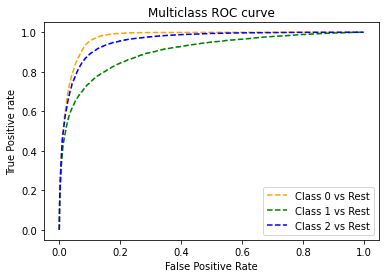

In [ ]:
# Evaluate the results
res=evaluate(xgb_model,X_train_fs,y_train,X_test_fs,y_test,'XGBoost')
final_list.append(res)

### We have very Good F1 score for both training and testing data using XGBoost model.

##  **Naive Bayes Classifier**

In [ ]:
# Importing the packages
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# Instantiating all the models.
gausian = GaussianNB()
bernoulli = BernoulliNB()
multinomial = MultinomialNB()

## 1) Gaussian

In [ ]:
# Fit the model
gausian.fit(X_train_fs,y_train)

GaussianNB()

----- Evaluation on train data -----

Confusion matrix 

[[34629    91  9233]
 [21753   272 21928]
 [13109   318 30525]]

 Accuracy =  0.4961852902364665

 Recall =  0.4961852902364665

 Precision =  0.46419343815947733

 F1 score =  0.4002016243875503

 Roc_Auc score =  0.6830431060966902


----- Evaluation on test data -----

Confusion matrix 

[[8768   27 2193]
 [5389   71 5528]
 [3324   68 7597]]

 Accuracy =  0.4985894130138025

 Recall =  0.4985894130138025

 Precision =  0.4750794512516483

 F1 score =  0.40209332703631967

 Roc_Auc score =  0.6877098539766836


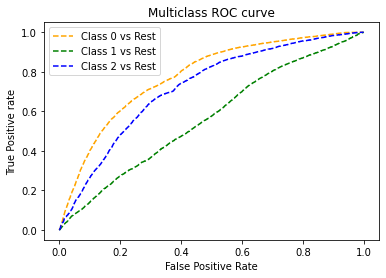

In [ ]:
# Evaluate results
res=evaluate(gausian,X_train_fs,y_train,X_test_fs,y_test,'Gaussian')
final_list.append(res)

## 2) Bernoulli

In [ ]:
# Fit model
bernoulli.fit(X_train_fs,y_train)

BernoulliNB()

----- Evaluation on train data -----

Confusion matrix 

[[33580    37 10336]
 [21612    90 22251]
 [13200    21 30731]]

 Accuracy =  0.48841177630481275

 Recall =  0.48841177630481275

 Precision =  0.5281486668921984

 F1 score =  0.3916147479153213

 Roc_Auc score =  0.6395547114758223


----- Evaluation on test data -----

Confusion matrix 

[[8535   11 2442]
 [5352   29 5607]
 [3335    7 7647]]

 Accuracy =  0.49176399211284694

 Recall =  0.49176399211284694

 Precision =  0.53326610436699

 F1 score =  0.3945026018683708

 Roc_Auc score =  0.6449615972624159


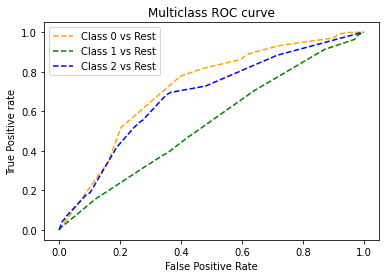

In [ ]:
# Evaluate model
res=evaluate(bernoulli,X_train_fs,y_train,X_test_fs,y_test,'Bernoulli')
final_list.append(res)

## 3) Multinomial

In [ ]:
# Fit the train set
multinomial.fit(X_train_fs,y_train)

MultinomialNB()

----- Evaluation on train data -----

Confusion matrix 

[[33580     0 10373]
 [21612     0 22341]
 [13200     0 30752]]

 Accuracy =  0.4878884860986819

 Recall =  0.4878884860986819

 Precision =  0.3251774592184981

 F1 score =  0.39012141522816296

 Roc_Auc score =  0.6776501766573914


----- Evaluation on test data -----

Confusion matrix 

[[8535    0 2453]
 [5352    0 5636]
 [3335    0 7654]]

 Accuracy =  0.49109661762475354

 Recall =  0.49109661762475354

 Precision =  0.3272619463320538

 F1 score =  0.3925893248058624

 Roc_Auc score =  0.6827570845790895


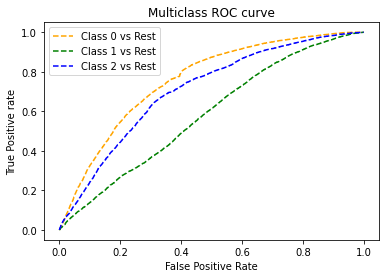

In [ ]:
# Evaluate the results
res=evaluate(multinomial,X_train_fs,y_train,X_test_fs,y_test,'Multinomial')
final_list.append(res)

### All the 3 models under naive bayes give results worse than the baseline models. Hence we reject these models.

## **KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Fit the model on the train set
knn_classifier.fit(X_train_fs,y_train)

KNeighborsClassifier()

----- Evaluation on train data -----

Confusion matrix 

[[31819  8490  3644]
 [ 1415 40997  1541]
 [  432  1005 42515]]

 Accuracy =  0.874660619757618

 Recall =  0.874660619757618

 Precision =  0.8827958441131445

 F1 score =  0.8719301347501875

 Roc_Auc score =  0.980476080753439


----- Evaluation on test data -----

Confusion matrix 

[[ 6992  2793  1203]
 [  746  9579   663]
 [  182   410 10397]]

 Accuracy =  0.8180797815865312

 Recall =  0.8180797815865312

 Precision =  0.8266927983236033

 F1 score =  0.8132836939511738

 Roc_Auc score =  0.9313992119999271


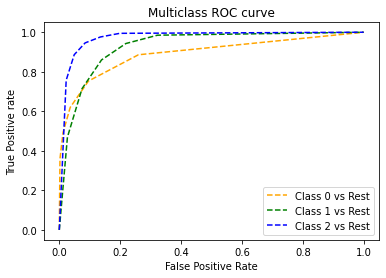

In [ ]:
# Evaluate the model
res=evaluate(knn_classifier,X_train_fs,y_train,X_test_fs,y_test,'KNN')
final_list.append(res)

In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
parameter_grid = {'n_neighbors':np.arange(1,5)}

In [ ]:
# Performing RandomSearch
knn = KNeighborsClassifier()
knn_cv= RandomizedSearchCV(knn,parameter_grid,cv=5)
knn_cv.fit(X_train_fs,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([1, 2, 3, 4])})

In [ ]:
print("Best score is: ",knn_cv.best_score_)

Best score is:  0.8492621051638849


In [ ]:
print("Best Parameters are: ",knn_cv.best_params_)

Best Parameters are:  {'n_neighbors': 1}


----- Evaluation on train data -----

Confusion matrix 

[[43880    60    13]
 [   56 43880    17]
 [   19    17 43916]]

 Accuracy =  0.9986197272823796

 Recall =  0.9986197272823796

 Precision =  0.9986197752392174

 F1 score =  0.9986197488476116

 Roc_Auc score =  0.9989647969283665


----- Evaluation on test data -----

Confusion matrix 

[[ 7885  2168   935]
 [  620 10025   343]
 [  181   261 10547]]

 Accuracy =  0.8632489003488548

 Recall =  0.8632489003488548

 Precision =  0.8682236489445726

 F1 score =  0.8604938328218641

 Roc_Auc score =  0.8974352886172388


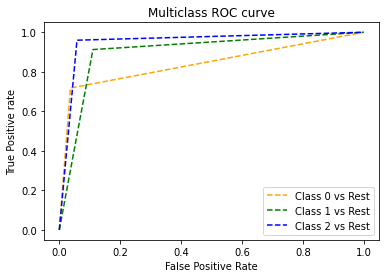

In [ ]:
# Evaluate results
res=evaluate(knn_cv,X_train_fs,y_train,X_test_fs,y_test,'Hyper_Tuned_KNN')
final_list.append(res)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Fitting Random Forest Classification to the Training set
random_f_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
random_f_classifier.fit(X_train_fs,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

----- Evaluation on train data -----

Confusion matrix 

[[43742   164    47]
 [  502 43347   104]
 [   75   144 43733]]

 Accuracy =  0.9921430629920066

 Recall =  0.9921430629920066

 Precision =  0.992161481127021

 F1 score =  0.9921425770010949

 Roc_Auc score =  0.9998304179987749


----- Evaluation on test data -----

Confusion matrix 

[[9736 1010  242]
 [1497 8629  862]
 [ 310  777 9902]]

 Accuracy =  0.8574852115880479

 Recall =  0.8574852115880479

 Precision =  0.8571956242472224

 F1 score =  0.8569732646456972

 Roc_Auc score =  0.9546160264152856


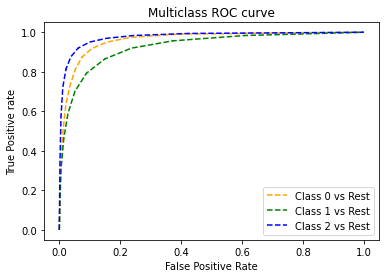

In [ ]:
# Evaluate results
res=evaluate(random_f_classifier,X_train_fs,y_train,X_test_fs,y_test,'Random_Forest')
final_list.append(res)

In [ ]:
# Number of trees
n_estimators = [50,100]

# Maximum depth of trees
max_depth = [4,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

#Average parameters
#avg= [None,'micro','macro','samples','weighted']

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

In [ ]:
# Random search
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=2,cv=5)

In [ ]:
rf_random.fit(X_train_fs,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   5.5s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   5.6s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   5.4s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   5.4s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   5.5s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   5.2s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   5.5s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   5.4s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   5.4s
[CV] END max_depth=8, min_samp

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [4, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100],
                                        'n_estimators': [50, 100]},
                   verbose=2)

In [ ]:
# The best esitmators
rf_random.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
# Building optimal model on the best estimators
rf_optimal_model = rf_random.best_estimator_

----- Evaluation on train data -----

Confusion matrix 

[[33155  6041  4757]
 [12268 14872 16813]
 [ 6525  5970 31457]]

 Accuracy =  0.6027999817986015

 Recall =  0.6027999817986015

 Precision =  0.5948908618613873

 F1 score =  0.5866928925392195

 Roc_Auc score =  0.7917528164392517


----- Evaluation on test data -----

Confusion matrix 

[[8313 1531 1144]
 [3024 3649 4315]
 [1598 1559 7832]]

 Accuracy =  0.6004550280600637

 Recall =  0.6004550280600637

 Precision =  0.5911402248050801

 F1 score =  0.5839379048091495

 Roc_Auc score =  0.7892658310823277


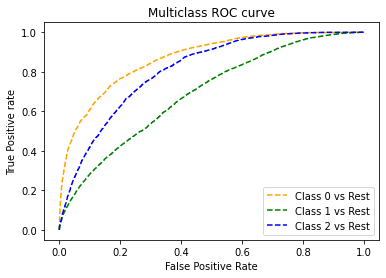

In [ ]:
# Evaluate results
res=evaluate(rf_optimal_model,X_train_fs,y_train,X_test_fs,y_test,'Hyper_Tuned_Random_Forest')

In [ ]:
All_model=pd.DataFrame(final_list)

In [ ]:
All_model

,Model Name,F1_Score_Train,Precision_Train,Recall_Train,Accuracy_Train,ROC_AUC_Train,F1_Score_Test,Precision_Test,Recall_Test,ACCURACY_Test,ROC_AUC_Test
0,Decision_Tree_On_Under_Sampled_data,0.999122,0.999123,0.999122,0.999122,0.999998,0.489612,0.489913,0.489466,0.489466,0.616709
1,SVM_On_Under_Sampled_Data,0.505861,0.523580,0.536435,0.536435,0.722129,0.482963,0.505824,0.511938,0.511938,0.702184
2,Hypertuned_SVM_On_Under_Sampled_data,0.543274,0.554801,0.564355,0.564355,0.745195,0.508849,0.517580,0.527388,0.527388,0.706739
3,Decision_Tree,0.998658,0.998661,0.998658,0.998658,0.999998,0.798527,0.798533,0.798726,0.798726,0.849651
4,XGBoost,0.904608,0.908935,0.906354,0.906354,0.981600,0.829786,0.833621,0.833611,0.833611,0.944274
5,XGBoost,0.904608,0.908935,0.906354,0.906354,0.981600,0.829786,0.833621,0.833611,0.833611,0.944274
6,Gaussian,0.400202,0.464193,0.496185,0.496185,0.683043,0.402093,0.475079,0.498589,0.498589,0.687710
7,Bernoulli,0.391615,0.528149,0.488412,0.488412,0.639555,0.394503,0.533266,0.491764,0.491764,0.644962
8,Multinomial,0.390121,0.325177,0.487888,0.487888,0.677650,0.392589,0.327262,0.491097,0.491097,0.682757
9,KNN,0.871930,0.882796,0.874661,0.874661,0.980476,0.813284,0.826693,0.818080,0.818080,0.931399


<Figure size 1440x720 with 0 Axes>

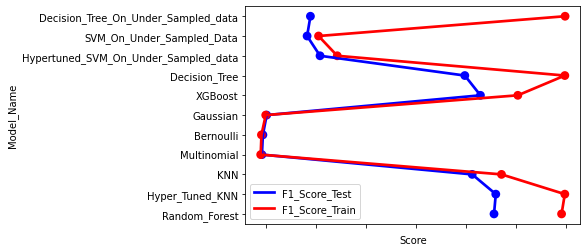

In [ ]:
ax=plt.figure(figsize=(20,10))
# creating subplots
ax = plt.subplots()
# plotting columns
ax = sns.pointplot(x=All_model["F1_Score_Test"], y=All_model["Model Name"], color='b',alpha=0.2,labels=('F1_Score_Test'))
ax = sns.pointplot(x=All_model["F1_Score_Train"], y=All_model["Model Name"], color='r',alpha=0.7,labels=('F1_Score_Train'))
# renaming the axes
ax.set(xlabel="Score", ylabel="Model_Name")
ax.legend(handles=ax.lines[::len(All_model)+1], labels=["F1_Score_Test","F1_Score_Train"])

ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# visulaizing illustration
plt.show()

<Figure size 1440x720 with 0 Axes>

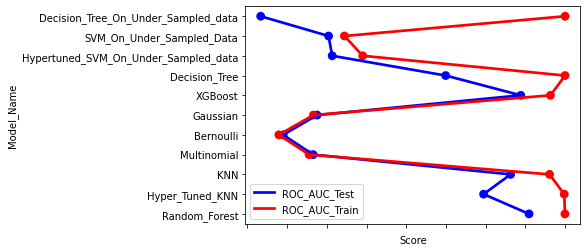

In [ ]:
plt.figure(figsize=(20,10))
# creating subplots
ax = plt.subplots()
# plotting columns
ax = sns.pointplot(x=All_model["ROC_AUC_Test"], y=All_model["Model Name"], color='b',alpha=0.2)
ax = sns.pointplot(x=All_model["ROC_AUC_Train"], y=All_model["Model Name"], color='r',alpha=0.7)
# renaming the axes
ax.set(xlabel="Score", ylabel="Model_Name")
ax.legend(handles=ax.lines[::len(All_model)+1], labels=["ROC_AUC_Test","ROC_AUC_Train"])

ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])
# visulaizing illustration
plt.show()

### From the above plots we can observe that <b>Random Forest</b> and <b>XG-Boost</b> performed well as compare to all the other models both for train as well as test. 


# **Conclusion**



* In EDA, we observed that Email_Campaign_Type was the most important feature. If your Email_Campaign_Type was 1, there is a 90% likelihood of your Email to be read/acknowledged.

* It was observed that both Time_Email_Sent and Customer_Location were insignificant in determining the Email_status. The ratio of the Email_Status was same irrespective of the demographic or the time frame the emails were sent on.

* For getting better acknowledged by the reader email should be written Email Type 2, Email source type 1 and Email campaign type 1(Email campaign type 1 are 10% ignored, 66% read and 24% acknowledged by reader)

* As the word_count increases beyond the 600 mark we see that there is a high possibility of that email being ignored. The ideal mark is 400-600. No one is interested in reading long mails !

* For modelling, it was observed that for imbalance handling Oversampling i.e. SMOTE worked way better than undersampling as the latter resulted in a lot of loss of information.

* Based on the metrics, Random forest and XG Boost Classifier worked the best giving a train score of 99% & 90% and test score of 85% & 82% respectively for F1 score.

### ***Hurrah! We have successfully completed your Machine Learning Capstone Project !!!***